### **Naufal Alif Anargya-2311110041-SD0401**

### **Tugas 5**

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2

c:\Users\HP VICTUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


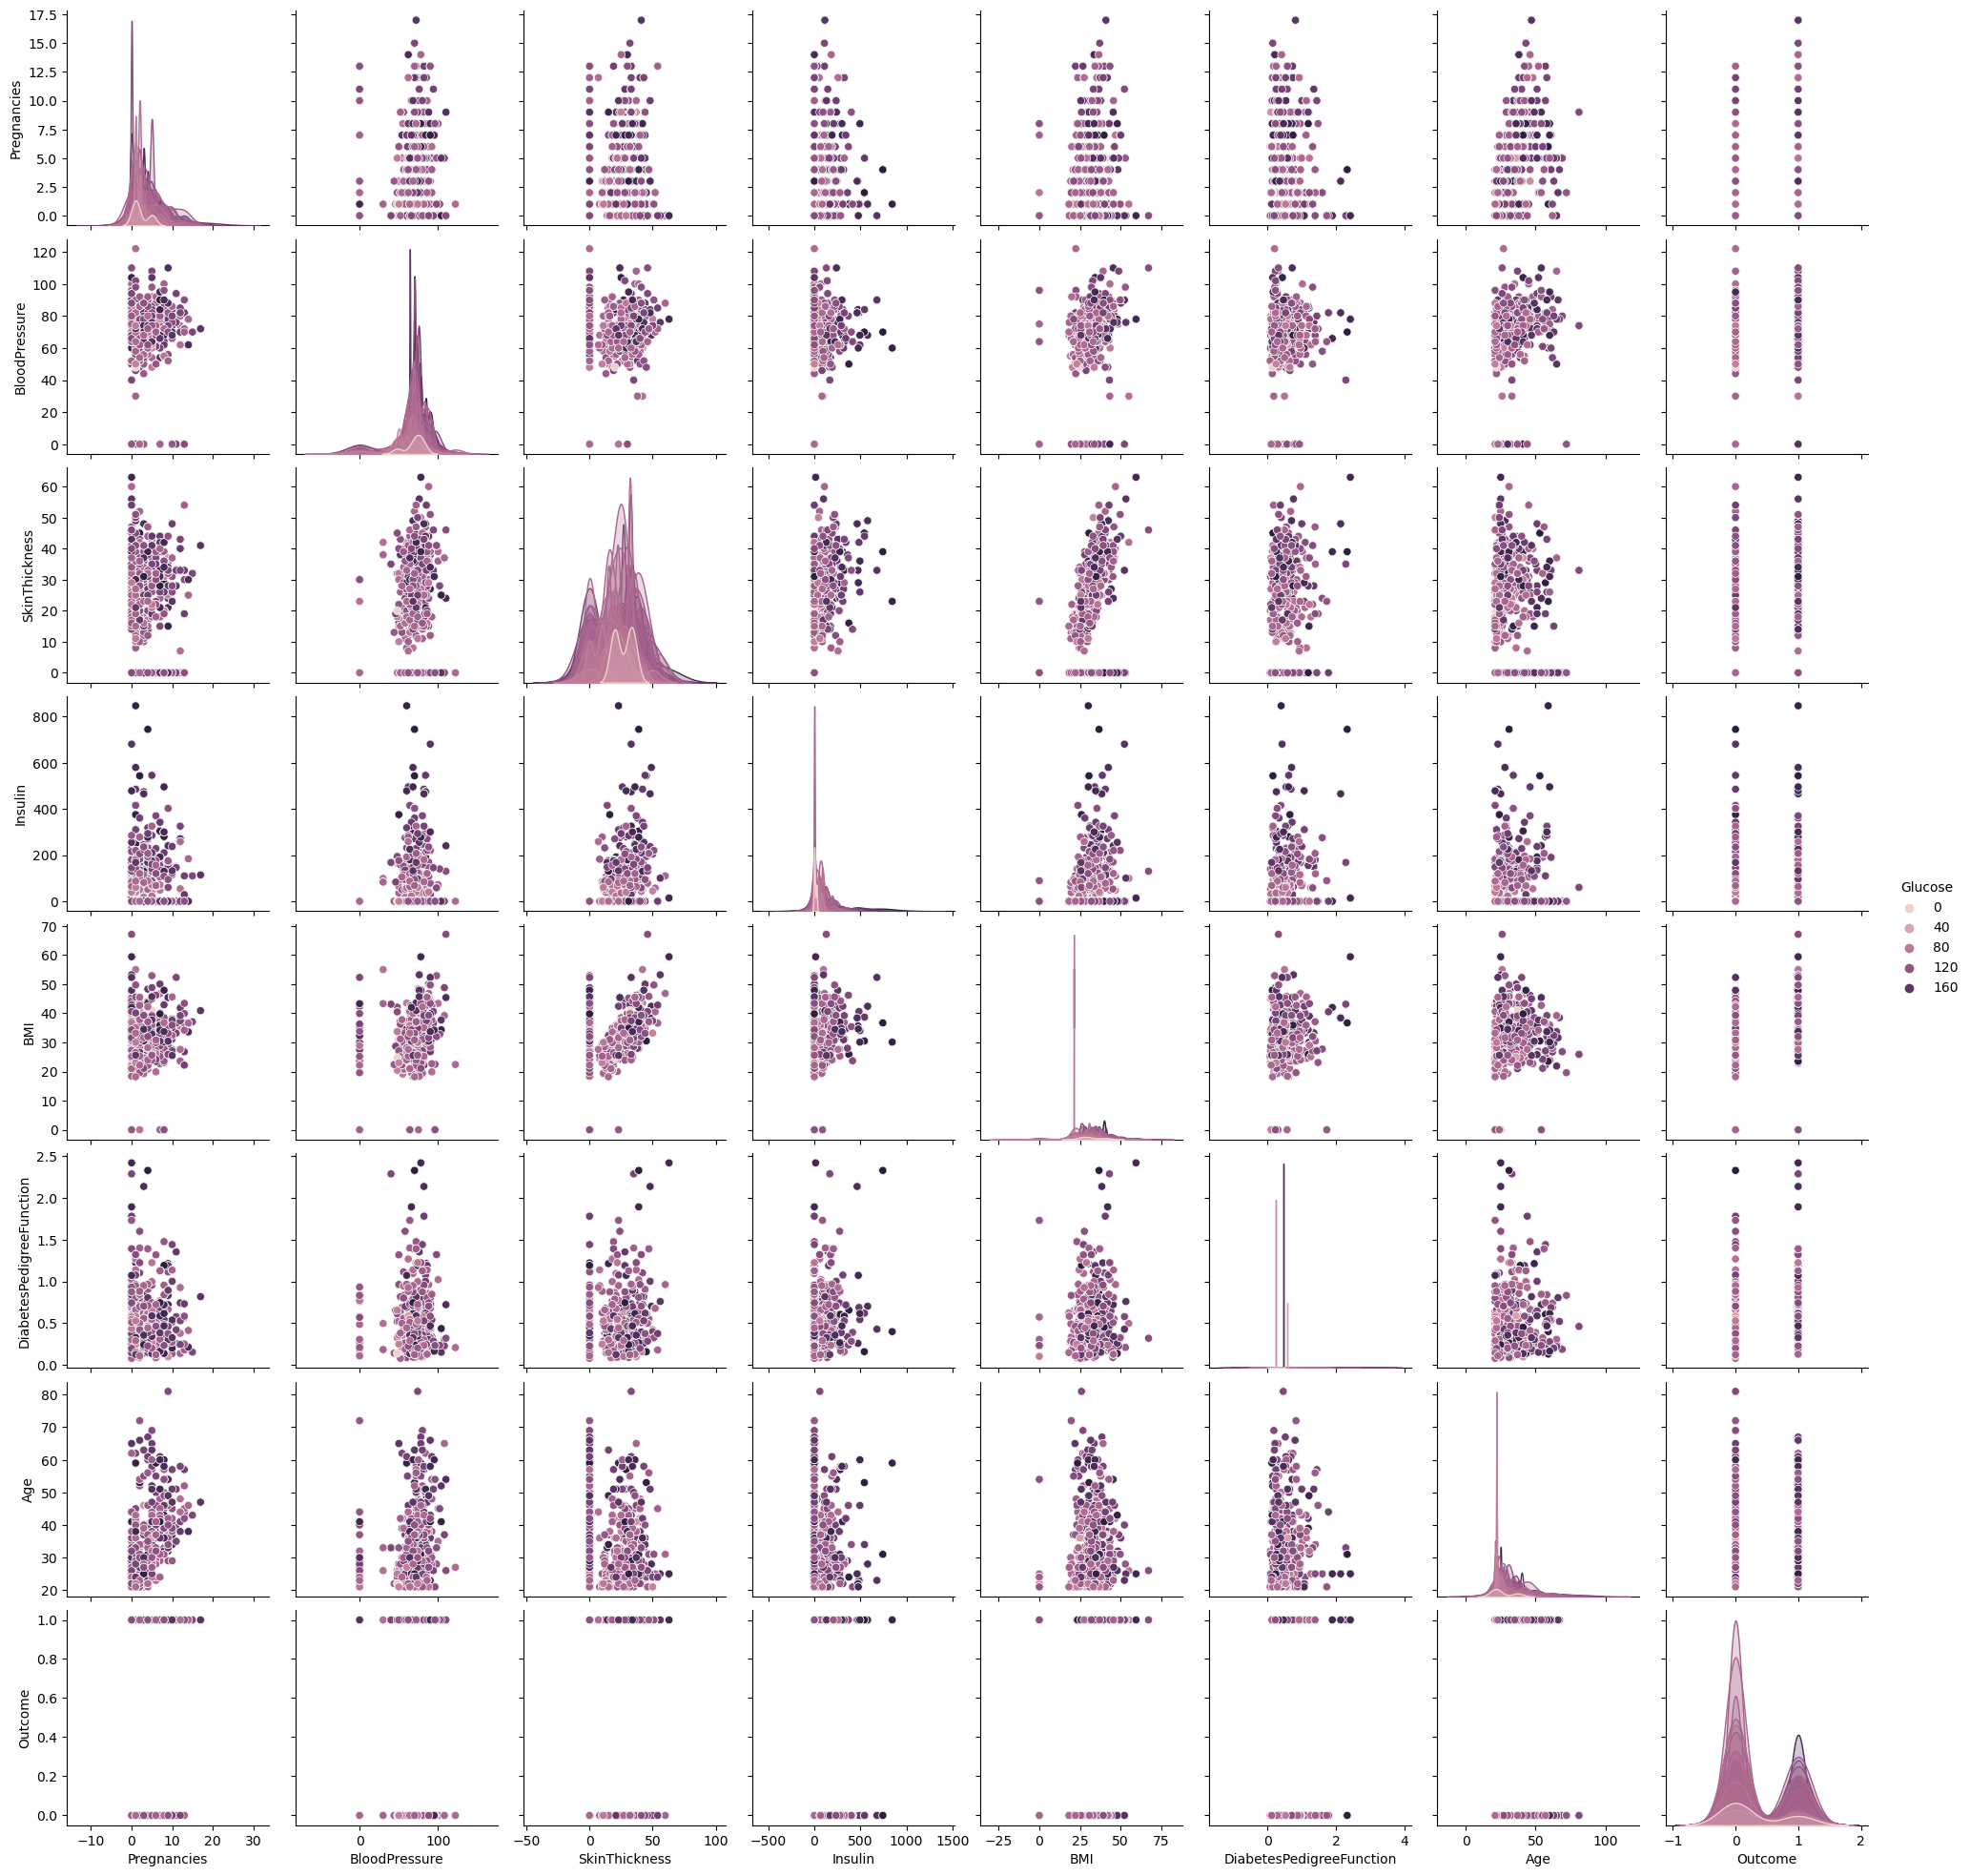

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
               Accuracy    Recall  Precision
KNN            0.780488  0.780488   0.843538
Decision Tree  0.993902  0.993902   0.997290
Naive Bayes    0.193089  0.193089   0.802367
Model terbaik berdasarkan akurasi adalah: Decision Tree


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score

data = pd.read_csv('Training.csv')

print(data.head())
print(data.info())
print(data.describe())
sns.pairplot(data, hue='Glucose')  
plt.show()

print(data.isnull().sum())

X = data.drop('Glucose', axis=1)
y = data['Glucose']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision
    }

results_df = pd.DataFrame(results).T
print(results_df)

best_model = results_df['Accuracy'].idxmax()
print(f'Model terbaik berdasarkan akurasi adalah: {best_model}')

#### **Penjelasan :**
**Interpretasi Hasil EDA dan Pre-Processing**

- **Struktur Data**: Dataset memiliki 2460 entri dengan 9 kolom, tanpa nilai yang hilang, yang memudahkan analisis.
  
- **Statistik Deskriptif**:
  - *Pregnancies*: Rata-rata 3.82 (maksimum 17), menunjukkan variasi signifikan.
  - *Glucose*: Rata-rata 121.60, dengan beberapa individu mengalami kadar glukosa tinggi.
  - *BloodPressure*: Rata-rata 68.92, sebagian besar dalam batas normal.
  - *SkinThickness* dan *Insulin*: Rata-rata masing-masing 20.53 dan 80.12, dengan nilai insulin yang tinggi pada beberapa individu.
  - *BMI*: Rata-rata 31.99, mengindikasikan sebagian besar mungkin kelebihan berat badan.
  - *DiabetesPedigreeFunction* dan *Age*: Indikasi riwayat keluarga diabetes, rata-rata usia 32.82.
  - *Outcome*: Sekitar 39% dari individu didiagnosis dengan diabetes.

**Matriks Evaluasi Model**

- *KNN*: Akurasi dan recall 78.05%, precision 84.35%.
- *Decision Tree*: Kinerja terbaik dengan akurasi 99.39%, recall 99.39%, dan precision 99.71%.
- *Naive Bayes*: Kinerja rendah dengan akurasi 19.31%, recall rendah, meski precision-nya 80.24%.

**Kesimpulan dan Rekomendasi**

- **Decision Tree** Berdasarkan hasil evaluasi, Decision Tree adalah model yang paling baik dengan akurasi 99.39%, recall 99.39%, dan precision 99.71%. Ini menunjukkan bahwa model ini sangat efektif dalam mengklasifikasikan individu sebagai diabetes atau tidak diabetes, dengan tingkat kesalahan yang sangat rendah.